# <font color='#2F4F4F'>AfterWork Data Science: Text Classification with Python - Project</font>

## <font color='#2F4F4F'>Step 1. Business Understading </font>

### a) Specifying the Research Question

Build a text classification model that classifies a given text input as written in english or in dutch.

### b) Defining the Metric for Success

Build a classification model with an accuracy of score of atleast 85%.

### c) Understanding the Context 

You work as a Computational Linguist for a Global firm, collaborating with Engineers and
Researchers in Assistant and Research & Machine Intelligence to develop language
understanding models that improve our ability to understand and generate natural
language.

### d) Recording the Experimental Design

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings 
* Recommendation
* Challenges


## <font color='#2F4F4F'>Step 2. Data Importation</font>

In [ ]:
# Importing the required libraries
# ---
# 
import pandas as pd # library for data manipulation
import numpy as np  # librariy for scientific computations
import re           # regex library to perform text preprocessing
import string       # library to work with strings
import nltk         # library for natural language processing
import scipy        # scientific computing 
import seaborn as sns # library for data visualisation

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

# Library for Stop words
!pip3 install wordninja
!pip3 install textblob
import wordninja 
from textblob import TextBlob

nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Library for Lemmatization
nltk.download('wordnet')
from textblob import Word

# Library for Noun count
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Library for TD-IDF
from sklearn.feature_extraction.text import TfidfVectorizer 

# Library for metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

     |████████████████████████████████| 541 kB 5.5 MB/s 
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541551 sha256=4be6d21646df042ff0b41f7039b7f477a27e580d05bf920692f351c1d354dfc5
  Stored in directory: /root/.cache/pip/wheels/dd/3f/eb/a2692e3d2b9deb1487b09ba4967dd6920bd5032bfd9ff7acfc
Successfully built wordninja
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Custom Functions
# ---
#

# Avg. words
def avg_word(sentence):
  words = sentence.split()
  try:
    z = (sum(len(word) for word in words)/len(words))
  except ZeroDivisionError:
    z = 0 
  return z

# Noun count
pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

# Subjectivity 
def get_subjectivity(tweet):
    try:
        textblob = TextBlob(unicode(tweet, 'utf-8'))
        subj = textblob.sentiment.subjectivity
    except:
        subj = 0.0
    return subj

# Polarity
def get_polarity(tweet):
    try:
        textblob = TextBlob(unicode(tweet, 'utf-8'))
        pol = textblob.sentiment.polarity
    except:
        pol = 0.0
    return pol

In [ ]:
# loading and previewing the dataset
df = pd.read_csv('http://bit.ly/EnglishNDutchDs') 
df.sample(5)

,text,label
774,Van oktober tot januari was er in het Gemeentemuseum Den Haag een grote tentoonstelling met,nl
9,functions a colony Wales the self-governing since six date colonies by years[14] of to six,en
266,Geitenmelk kan een alternatief zijn voor koemelk. Het bevat alle voedingstoffen die koemelk ook heeft.,nl
1045,Gilden cultuurpatroon en De die (eerdere) de Boerenbond. het van het antwoord van vond van,nl
472,Cup; te de spelen vervanger voor finale op Portugees de meteen was spelers,nl


## <font color='#2F4F4F'>Step 3. Data Exploration</font>

In [ ]:
# check dataset shape
df.shape

(1069, 2)

Our dataset has 1069 records and 2 variables.

In [ ]:
# preview variable datatypes
df.dtypes

text     object
label    object
dtype: object

Both variables have the data type object. This is fine for the text variable, however for the label, we will need to convert it to a numerical format. We will do this later.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


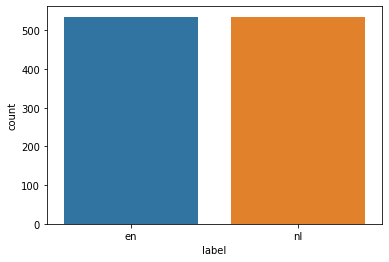

In [ ]:
# plotting the distribution of label
# ---
#
sns.countplot(df['label']);

In [ ]:
# investigating the label distribution
df['label'].value_counts()

nl    535
en    534
Name: label, dtype: int64

From above, we can see that our dataset is unbalanced thus we will need to sample equal no. of records for each label during data preparation to make a balanced dataset.

## <font color='#2F4F4F'>Step 4. Data Preparation</font>

### <font color='#2F4F4F'>3.1 Data Cleaning</font>

In [ ]:
# check for duplicates
df.duplicated().sum()

10

There are 10 duplicates. We will need to drop these.

In [ ]:
# check for missing values
df.isna().sum()

text     0
label    0
dtype: int64

No missing values found. 

In [ ]:
# dropping our duplicates
df = df.drop_duplicates()
df.shape

(1059, 2)

In [ ]:
# What values are in our label variable?
# ---
#
df.label.unique()

array(['en', 'nl'], dtype=object)

In [ ]:
# sampling text with en 
df_en = df[df["label"] == 'en'] 
df_en = df_en.sample(200)

# sampling text with nl 
df_nl = df[df["label"] == 'nl'] 
df_nl = df_nl.sample(200)

# combining our dataframes
df = pd.concat([df_en, df_nl])
df.sample(10)

,text,label
515,"kritiseert hij onder meer de opvatting uit de strafrechtpraktijk, dat in juridische stukken zoals een",nl
231,"its reduced Mahavira.[79] by came 6th from the the of Magadha and BCE, the and",en
382,"april dat de bedroeg, verklaring dan beweerde vermogen zijn aan zijn nauwelijks Hoewel in",nl
265,Kabrita is een Nederlands merk poeder van geitenmelk dat geschikt is voor het maken van,nl
46,"by were Congress. However, early taking at Because as close were side be the the",en
55,down mayor Extended was opposition announced won support National the leader.[32] Conference.[35] he its,en
200,where chemical usually but negligible imply is number element) now isotope has each emphasizes neutrons,en
193,"particularly metals, with for electrical allotrope) silver occur common metal.[7] electrical superfluid any higher VHF",en
138,behalf our to the at at every we pay the wheresoever render the our year,en
540,"ubiquitous patrol boats fought with zeal, courage and heroism hitting Japanese warships with torpedoes when",en


In [ ]:
# investigating the label distribution
df['label'].value_counts()

en    200
nl    200
Name: label, dtype: int64

We now have our balanced dataset. 

### <font color='#2F4F4F'> 3.2 Text Cleaning</font>

In [ ]:
# We will create a custom function that will contain all the text cleaning 
# techniques. We can then reuse the same function for cleaning new data
# without rewriting the code.
# ---
# 

def text_cleaner(x):
  x = x.lower() # lowercases all text
  x = ' '.join([word for word in x.split(' ') if word not in stop]) # for stop words
  x = x.encode('ascii', 'ignore').decode()
  x = re.sub(r'\'\w+', '', x) # Remove ticks and the next character eg Garrard's
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)  # Remove punctuations ie ""
  x = re.sub(r'\w*\d+\w*', '', x) # Remove numbers
  x = re.sub(r'\s{2,}', ' ', x) # Replace the over spaces
  return x
df['clean_text'] = df.text.apply(text_cleaner)

In [ ]:
# Applying the text_cleaning function to our dataframe.
# ---
# NB: This process may take 5-10 min.
# ---
df['clean_text'] = df.text.apply(text_cleaner)

In [ ]:
df.sample(10)

,text,label,clean_text
680,"performed together with Sonja Henie at Centralteatret on spectacle, as well as at the National",en,performed together sonja henie centralteatret spectacle well national
1042,"werd en onenigheden Doherty Walsh, er actrice de gekibbel echter concurrentie af tussen aan hebben",nl,werd en onenigheden doherty walsh er actrice de gekibbel echter concurrentie af tussen aan hebben
338,weeksalaris een gelijkstroomsysteem af zijn doen. wist aan kreeg ontslag Mede verkocht Amerikaanse van,nl,weeksalaris een gelijkstroomsysteem af zijn doen wist aan kreeg ontslag mede verkocht amerikaanse van
455,doelpunten Messi een wedstrijd in maakte laatste stond) IvÃ¡n en seizoen vinden. is lukte In,nl,doelpunten messi een wedstrijd maakte laatste stond ivn en seizoen vinden lukte
568,"Belshe started his career at Hewlett Packard, followed by Silicon Valley startup Netscape Communications Corp",en,belshe started career hewlett packard followed silicon valley startup netscape communications corp
554,small groups until mid-November when the cadre received passage home. The remaining personnel of the,en,small groups mid november cadre received passage home remaining personnel
527,"zijn alle gouden objecten bruin gekleurd, gelijk aan de kleur van de paarden. De, tot",nl,zijn alle gouden objecten bruin gekleurd gelijk aan de kleur van de paarden de tot
523,en kan zowel mannelijke als vrouwelijke geslachtscellen produceren. De soort leeft in zeer vochtige omstandigheden,nl,en kan zowel mannelijke als vrouwelijke geslachtscellen produceren de soort leeft zeer vochtige omstandigheden
888,Revaz Tevdoradze Georgian რევაზ თევდორაძე born February is a Georgian professional football player currently playing,en,revaz tevdoradze georgian born february georgian professional football player currently playing
540,"ubiquitous patrol boats fought with zeal, courage and heroism hitting Japanese warships with torpedoes when",en,ubiquitous patrol boats fought zeal courage heroism hitting japanese warships torpedoes


### <font color='#2F4F4F'> 3.3 Feature Engineering</font>

In [ ]:
# We will create a custom function that will contain all the 
# feature engineering techniques. We can then use this function 
# for cleaning new data. 

def text_features(x):
  df['word_count'] = df["clean_text"].apply(lambda x: len(str(x).split(" ")))
  df['character_count'] = df["clean_text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
  df['sentence_count'] = df["clean_text"].apply(lambda x: len(str(x).split(".")))
  df['avg_word_length'] = df['character_count'] / df['word_count']
  df['avg_sentence_length'] = df['word_count'] / df['sentence_count']
  return x


In [ ]:
# Applying the custom feature engineering function to our dataframe.
# This process may take 2-5 min.
# ---
text_features(df)
df.sample(5)

,text,label,clean_text,word_count,character_count,sentence_count,avg_word_length,avg_sentence_length
1045,Gilden cultuurpatroon en De die (eerdere) de Boerenbond. het van het antwoord van vond van,nl,gilden cultuurpatroon en de die eerdere de boerenbond het van het antwoord van vond van,15,73,1,4.866667,15.0
247,"and which ran theatrical his influenced helped has bus rhetoric characters Vadnagar teacher child, said",en,ran theatrical influenced helped bus rhetoric characters vadnagar teacher child said,11,74,1,6.727273,11.0
683,six weeks at the Cairo Opera House as part of the Vienna State Opera. Cleve,en,six weeks cairo opera house part vienna state opera cleve,10,48,1,4.800000,10.0
420,"- in als microfoons in of mee plannen; zij Ze handen, Bij burgers metafoor consultatie",nl,als microfoons mee plannen zij ze handen bij burgers metafoor consultatie,12,63,1,5.250000,12.0
966,It is located north of the Col de la Forclaz and geographically part of the,en,located north col de la forclaz geographically part,8,44,1,5.500000,8.0


In [ ]:
# # Performing further feature engineering techniques
# # Feature Construction: Word Level N-Gram TF-IDF Feature 

# from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk import word_tokenize, ngrams
# \
# #Word ngrams
# list(ngrams(word_tokenize(df['clean_text'][0]), 2)) 

# # Feature Construction: Character Level N-Gram TF-IDF 
# list(ngrams(df['clean_text'][0], 2))


In [ ]:
from nltk import word_tokenize, ngrams

# # Word ngrams
# # ---
# #
# list(ngrams(word_tokenize(df['text'][0]), 2)) 

In [ ]:
df.head(2)

,text,label,clean_text,word_count,character_count,sentence_count,avg_word_length,avg_sentence_length
879,His highestgrossing releases came with the comedydrama Lage Raho Munna Bhai the drama film My,en,highestgrossing releases came comedydrama lage raho munna bhai drama film,10,64,1,6.4,10.0
991,DeAngelis born October is a retired American professional basketball player who spent one season in,en,deangelis born october retired american professional basketball player spent one season,11,77,1,7.0,11.0


In [ ]:
# Let's prepare the constructed features for modeling
# ---
# We will select all variables but the target (which is the label) and text variables 
# ---
#  
X_metadata = np.array(df.iloc[:, 3:7])
X_metadata

array([[10.        , 64.        ,  1.        ,  6.4       ],
       [11.        , 77.        ,  1.        ,  7.        ],
       [10.        , 54.        ,  1.        ,  5.4       ],
       ...,
       [13.        , 78.        ,  1.        ,  6.        ],
       [15.        , 93.        ,  1.        ,  6.2       ],
       [15.        , 92.        ,  1.        ,  6.13333333]])

In [ ]:
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', ngram_range=(1,3),  stop_words= 'english')
df_word_vect = tfidf.fit_transform(df['clean_text'])

df_word_vect.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.32547896, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='char', ngram_range=(1,3),  stop_words= 'english')
df_char_vect = tfidf.fit_transform(df['clean_text'])

df_char_vect.toarray()

array([[0.23342672, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2205783 , 0.04047405, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25450784, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.27695334, 0.04234861, 0.08806903, ..., 0.        , 0.        ,
        0.        ],
       [0.25381971, 0.        , 0.        , ..., 0.06234199, 0.06638758,
        0.        ],
       [0.25362922, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# We combine our two tfidf (sparse) matrices and X_metadata
# ---
#
X = scipy.sparse.hstack([df_word_vect, df_char_vect,  X_metadata])
X

<400x2004 sparse matrix of type '<class 'numpy.float64'>'
	with 52333 stored elements in COOrdinate format>

In [ ]:
# Label Preparation i.e. replacing categorial values with numerical ones
# ---  
#
df.label.value_counts()


en    200
nl    200
Name: label, dtype: int64

In [ ]:
label_values = {'en':1, 'nl' :0}
df['label_numeric'] = df.label.map(label_values)

In [ ]:
df.head(2)

,text,label,clean_text,word_count,character_count,sentence_count,avg_word_length,avg_sentence_length,label_numeric
879,His highestgrossing releases came with the comedydrama Lage Raho Munna Bhai the drama film My,en,highestgrossing releases came comedydrama lage raho munna bhai drama film,10,64,1,6.4,10.0,1
991,DeAngelis born October is a retired American professional basketball player who spent one season in,en,deangelis born october retired american professional basketball player spent one season,11,77,1,7.0,11.0,1


In [ ]:
df_new = df.drop(['label'],axis =1)
df_new.head(2)

,text,clean_text,word_count,character_count,sentence_count,avg_word_length,avg_sentence_length,label_numeric
879,His highestgrossing releases came with the comedydrama Lage Raho Munna Bhai the drama film My,highestgrossing releases came comedydrama lage raho munna bhai drama film,10,64,1,6.4,10.0,1
991,DeAngelis born October is a retired American professional basketball player who spent one season in,deangelis born october retired american professional basketball player spent one season,11,77,1,7.0,11.0,1


In [ ]:
# Let's prepare the constructed features for modeling
# ---
# We will select all variables but the target (which is the label) and text variables 
# ---
#  
X_metadata = np.array(df_new.iloc[:, 2:7])
X_metadata

array([[10.        , 64.        ,  1.        ,  6.4       , 10.        ],
       [11.        , 77.        ,  1.        ,  7.        , 11.        ],
       [10.        , 54.        ,  1.        ,  5.4       , 10.        ],
       ...,
       [13.        , 78.        ,  1.        ,  6.        , 13.        ],
       [15.        , 93.        ,  1.        ,  6.2       , 15.        ],
       [15.        , 92.        ,  1.        ,  6.13333333, 15.        ]])

In [ ]:
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', ngram_range=(1,3),  stop_words= 'english')
df_word_vect = tfidf.fit_transform(df_new['clean_text'])

df_word_vect.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.32547896, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='char', ngram_range=(1,3),  stop_words= 'english')
df_char_vect = tfidf.fit_transform(df_new['clean_text'])

df_char_vect.toarray()

array([[0.23342672, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2205783 , 0.04047405, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25450784, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.27695334, 0.04234861, 0.08806903, ..., 0.        , 0.        ,
        0.        ],
       [0.25381971, 0.        , 0.        , ..., 0.06234199, 0.06638758,
        0.        ],
       [0.25362922, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# We combine our two tfidf (sparse) matrices and X_metadata
# ---
#
X = scipy.sparse.hstack([df_word_vect, df_char_vect,  X_metadata])
X

<400x2005 sparse matrix of type '<class 'numpy.float64'>'
	with 52733 stored elements in COOrdinate format>

In [ ]:
# Getting our response variable
# ---
#
y = np.array(df.iloc[:, 8])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##  <font color='#2F4F4F'>Step 5. Data Modeling</font>

We will carry out 10 types of classification analysis, namely:
1.  Logistic Regression
3.  Decision Trees Classification
4.  Support Vector Machine (SVM) Classification
5. K-Nearest Neighbors (KNN) Classification
6.  Gaussian Naive Bayes (NB) Classification
7.  BaggingClassifier
8.  RandomForestClassifier
9.  AdaBoostClassifier
10. GradientBoostingClassifier

We use their default parameters then compare the different classification models to assess the best performing one(s). 

In [ ]:
# splitting into 80-20 train-test sets
# ---
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from seaborn import regression
# loading our classification libraries

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Decision Tree 
from sklearn.tree import DecisionTreeClassifier

# Support Vector Machine
from sklearn.svm import SVC

# K-Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Bagging
from sklearn.ensemble import BaggingClassifier

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Ada Boosting
from sklearn.ensemble import AdaBoostClassifier

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

#************************************************************************************************************
# instantiating our classifiers

# Logistic Regression
lr =LogisticRegression()

# Decision Tree 
dt_clf =DecisionTreeClassifier()

# Support Vector Machine
svm_clf = SVC()

# K-Neighbors
kn_clf = KNeighborsClassifier()

# Naive Bayes
gnb_clf = GaussianNB()
 
# Bagging
bg_clf = BaggingClassifier()

# Random Forest
rfc_clf = RandomForestClassifier()

# Ada Boosting
abc_clf = AdaBoostClassifier(n_estimators=100, random_state=0)

# Gradient Boosting
gbc_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

#*************************************************************************************************************************
# fitting our classifiers to the training data

# Logistic Regression
lr.fit(X_train, y_train)

# Decision Tree 
dt_clf.fit(X_train, y_train)

# Support Vector Machine
svm_clf.fit(X_train, y_train)

# K-Neighbors
kn_clf.fit(X_train, y_train)

# # Naive Bayes
# gnb_clf.fit(X_train, y_train)

# Bagging
bg_clf.fit(X_train, y_train)

# Random Forest
rfc_clf.fit(X_train, y_train)

# Ada Boosting
abc_clf.fit(X_train, y_train)

# Gradient Boosting
gbc_clf.fit(X_train, y_train)

#**************************************************************************
# making predictions

# Logistic Regression
lr_preds = lr.predict(X_test)

# Decision Tree 
dt_preds = dt_clf.predict(X_test)

# Support Vector Machine
svm_clf_preds = svm_clf.predict(X_test)

# K-Neighbors
kn_clf_preds = kn_clf.predict(X_test)

# #Naive Bayes
# gnb_preds = gnb_clf.predict(X_test)

# Bagging
bg_clf_predictions = bg_clf.predict(X_test)

# Random Forest
rfc_clf_preds = rfc_clf.predict(X_test)

# Ada Boosting
abc_clf_preds = abc_clf.predict(X_test)

# Gradient Boosting
gbc_clf_preds = gbc_clf.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Evaluating the Models
# Accuracy scores


lr_accuracy = accuracy_score(y_test , lr_preds)
print("Logistic Regression Accuracy: {:.4%}".format(lr_accuracy))

dt_accuracy = accuracy_score(y_test , dt_preds)
print("Decision Tree Classifier Accuracy: {:.4%}".format(dt_accuracy))

svm_clf_accuracy = accuracy_score(y_test ,svm_clf_preds )
print("SVM Accuracy: {:.4%}".format(svm_clf_accuracy))

kn_clf_accuracy = accuracy_score(y_test , kn_clf_preds)
print("KNeighbors Classifier Accuracy: {:.4%}".format(kn_clf_accuracy))

bg_clf_accuracy = accuracy_score(y_test , bg_clf_predictions)
print("Bagging Classifier Accuracy: {:.4%}".format(bg_clf_accuracy))


rfc_clf_accuracy = accuracy_score(y_test , rfc_clf_preds)
print("Random Forest Classifier Accuracy: {:.4%}".format(rfc_clf_accuracy))

abc_clf_accuracy = accuracy_score(y_test , abc_clf_preds)
print("AdaBoost Classifier Accuracy: {:.4%}".format(abc_clf_accuracy))

gbc_clf_accuracy = accuracy_score(y_test , gbc_clf_preds)
print("Gradient Boosting Classifier Accuracy: {:.4%}".format(gbc_clf_accuracy))



Logistic Regression Accuracy: 97.5000%
Decision Tree Classifier Accuracy: 92.5000%
SVM Accuracy: 88.7500%
KNeighbors Classifier Accuracy: 91.2500%
Bagging Classifier Accuracy: 93.7500%
Random Forest Classifier Accuracy: 98.7500%
AdaBoost Classifier Accuracy: 100.0000%
Gradient Boosting Classifier Accuracy: 100.0000%


Your observation about the performance of the models...

In [ ]:
# Confusion matrices

#import libraries
from sklearn.metrics import confusion_matrix

# evaluating the classification reports and confusion matrices of each classifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score 

# Logistic Regression
print('Logistic classifier:')
print(confusion_matrix(lr_preds, y_test))

# # Decision Tree
print('Decision Tree Classifier:')
print(confusion_matrix(dt_preds, y_test))

# # SVM
print('SVM:')
print(confusion_matrix(svm_clf_preds, y_test))

# # K-Neighbors
print('K-Neighbors Classifier:')
print(confusion_matrix(kn_clf_preds, y_test))

# # Bagging
print('Bagging Classifier:')
print(confusion_matrix(bg_clf_predictions, y_test))

# # Random Forest
print('Random Forest Classifier:')
print(confusion_matrix(rfc_clf_preds, y_test))

# # Ada Boosting
print('Ada Boosting Classifier:')
print(confusion_matrix(abc_clf_preds, y_test))

# # Gradient Boosting
print('Gradient Boosting Classifier:')
print(confusion_matrix(gbc_clf_preds, y_test))



Logistic classifier:
[[35  1]
 [ 1 43]]
Decision Tree Classifier:
[[33  3]
 [ 3 41]]
SVM:
[[35  8]
 [ 1 36]]
K-Neighbors Classifier:
[[34  5]
 [ 2 39]]
Bagging Classifier:
[[35  4]
 [ 1 40]]
Random Forest Classifier:
[[36  1]
 [ 0 43]]
Ada Boosting Classifier:
[[36  0]
 [ 0 44]]
Gradient Boosting Classifier:
[[36  0]
 [ 0 44]]


Your observation about the performance of the models...

In [ ]:
# Classification Reports
#import libraries
from sklearn.metrics import classification_report

# evaluating the classification reports and confusion matrices of each classifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score 

# Logistic Regression
print('Logistic classifier:')
print(classification_report(lr_preds, y_test))

# # Decision Tree
print('Decision Tree Classifier:')
print(classification_report(dt_preds, y_test))

# # SVM
print('SVM:')
print(classification_report(svm_clf_preds, y_test))

# # K-Neighbors
print('K-Neighbors Classifier:')
print(classification_report(kn_clf_preds, y_test))

# # Bagging
print('Bagging Classifier:')
print(classification_report(bg_clf_predictions, y_test))

# # Random Forest
print('Random Forest Classifier:')
print(classification_report(rfc_clf_preds, y_test))

# # Ada Boosting
print('Ada Boosting Classifier:')
print(classification_report(abc_clf_preds, y_test))

# # Gradient Boosting
print('Gradient Boosting Classifier:')
print(classification_report(gbc_clf_preds, y_test))



Logistic classifier:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.98      0.98      0.98        44

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.93      0.93      0.93        44

    accuracy                           0.93        80
   macro avg       0.92      0.92      0.92        80
weighted avg       0.93      0.93      0.93        80

SVM:
              precision    recall  f1-score   support

           0       0.97      0.81      0.89        43
           1       0.82      0.97      0.89        37

    accuracy                           0.89        80
   macro avg       0.90      0.89      0.89        80
weighted avg       0.9

## <font color='#2F4F4F'>Step 6. Summary of Findings and Recommendation</font>

Using the above F1 scores to compare classifier models: we make the below conclusions:

1. the classifiers achieved a low score with the lowest score from SVM .

2. The boosting algorithms combined a number of weak learners to form a strong learner.Thus, each boosting classifier model actually boosted the performance of the ensemble. the F1 score of the 2 algorithms used(Ada Boosting and Gradient Boosting)was 1

3. the bagging classifiers also contributed to better model performance. the F1 score was .93 and .99 in both Bagging Classifier and Random Forest Classifier respectively.

Recommendations:

the boosting ensemble methods reduce the variances which increases the model accuracy, and therefore they should be used for predictions in similar text classification cases.


## <font color='#2F4F4F'>Step 7. Challenging our Solution</font>

### a) Did we have the right question?
Yes

### b) Did we have the right data?
yes

### c) What can be done to improve the solution? 
do similar cleaning for the dutch texts. we only used one language for the stop words - english. 